In [64]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import torch
import torch.nn as nn
import ipywidgets as widgets
from ipywidgets import interact, Layout
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Running on: {device}")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Running on: cuda


In [92]:
def generate_data(obs_type='linear', error_size=2):
    '''Generates data for linear, quadratic or harmonic function'''
    x = torch.linspace(0, 2 * np.pi, 100)
    if obs_type == 'linear':
        m = 1*torch.rand(1) -1
        b = 1*torch.rand(1) -1
        y = x*m + b + torch.rand(x.shape)*error_size
    elif obs_type == 'quadratic':
        a = 2*torch.rand(1) -1
        b = 5*torch.rand(1) -1
        c = 2*torch.rand(1) -1
        y =  a*x**2 + b*x + c + torch.rand(x.shape)*error_size
    elif obs_type == 'harmonic':
        a = 2 * torch.rand(1) - 1
        b = 5 * torch.rand(1) - 1
        c = 3 * torch.rand(1) - 1
        d = 2 * torch.rand(1) - 1
        y = a*x**2 + b*np.sin(x) + c*np.cos(3*x) + d + torch.rand(x.shape)*error_size 
    return x, y

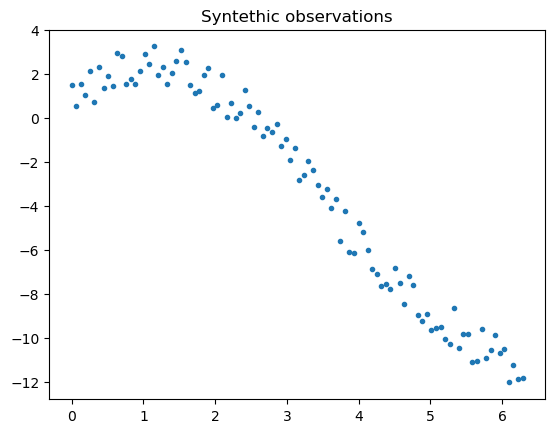

In [94]:
x, y = generate_data(obs_type='harmonic')
plt.plot(x, y, '.')
plt.title("Syntethic observations")
plt.show()